# Import packages and load data

In [229]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np


path = r'/Users/kggiorno/Desktop/spring/capstone1/data'                 
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, axis=0, ignore_index=True)

concatenated_df = concatenated_df.rename(columns=lambda x: x.strip())

concatenated_df.head()
print(concatenated_df.shape)
print(concatenated_df.columns)

(23218, 29)
Index(['RIN', 'Primary Key', 'Date Occurred', 'Time Occurred', 'Location',
       'Area Command', 'Nature of Contact', 'Reason Desc', 'R2R Level',
       'Master Subject ID', 'Subject Sex', 'Subject Race', 'Subject Ethnicity',
       'Subject Conduct Desc', 'Subject Resistance', 'Weapon Used 1',
       'Weapon Used 2', 'Weapon Used 3', 'Weapon Used 4', 'Weapon Used 5',
       'Number Shots', 'Subject Effects', 'Effect on Officer',
       'Officer Organization Desc', 'Officer Commission Date',
       'Officer Yrs of Service', 'X-Coordinate', 'Y-Coordinate',
       'CouncilDistrict'],
      dtype='object')


In [230]:
concatenated_df.isnull().any()

RIN                          False
Primary Key                  False
Date Occurred                False
Time Occurred                 True
Location                     False
Area Command                  True
Nature of Contact             True
Reason Desc                   True
R2R Level                     True
Master Subject ID             True
Subject Sex                   True
Subject Race                  True
Subject Ethnicity             True
Subject Conduct Desc          True
Subject Resistance            True
Weapon Used 1                 True
Weapon Used 2                 True
Weapon Used 3                 True
Weapon Used 4                 True
Weapon Used 5                 True
Number Shots                  True
Subject Effects               True
Effect on Officer             True
Officer Organization Desc     True
Officer Commission Date       True
Officer Yrs of Service       False
X-Coordinate                  True
Y-Coordinate                  True
CouncilDistrict     

In [231]:
concatenated_df.isnull().sum()

RIN                              0
Primary Key                      0
Date Occurred                    0
Time Occurred                  871
Location                         0
Area Command                    35
Nature of Contact               19
Reason Desc                     22
R2R Level                       26
Master Subject ID              179
Subject Sex                    729
Subject Race                   729
Subject Ethnicity             1021
Subject Conduct Desc          4898
Subject Resistance              34
Weapon Used 1                   91
Weapon Used 2                22077
Weapon Used 3                23064
Weapon Used 4                23205
Weapon Used 5                23216
Number Shots                 18691
Subject Effects                 56
Effect on Officer              725
Officer Organization Desc       33
Officer Commission Date         24
Officer Yrs of Service           0
X-Coordinate                    41
Y-Coordinate                    41
CouncilDistrict     

In [232]:
871/23218

0.037513997760358346

In [233]:
concatenated_df.dropna(subset=['Time Occurred', 'X-Coordinate', 'Y-Coordinate'], inplace=True, how='any')

print(concatenated_df.isnull().sum())
print(concatenated_df.shape)

RIN                              0
Primary Key                      0
Date Occurred                    0
Time Occurred                    0
Location                         0
Area Command                     0
Nature of Contact               18
Reason Desc                     21
R2R Level                       25
Master Subject ID              168
Subject Sex                    706
Subject Race                   706
Subject Ethnicity              986
Subject Conduct Desc          4688
Subject Resistance              33
Weapon Used 1                   90
Weapon Used 2                21210
Weapon Used 3                22160
Weapon Used 4                22293
Weapon Used 5                22304
Number Shots                 17977
Subject Effects                 53
Effect on Officer              654
Officer Organization Desc       27
Officer Commission Date         24
Officer Yrs of Service           0
X-Coordinate                     0
Y-Coordinate                     0
CouncilDistrict     

In [234]:
print(concatenated_df['Nature of Contact'].value_counts())

DISPATCHED CALL       13168
VIEWED OFFENSE         4893
OTHER                  1727
TRAFFIC STOP           1530
TACTICAL OPERATION      701
WARRANT SERVICE         269
Name: Nature of Contact, dtype: int64


In [235]:
print(concatenated_df['Reason Desc'].value_counts())

NECESSARY TO EFFECT ARREST / DETENTION             12723
IN CUSTODY, MAINTAINING CONTROL                     4298
TO RESTRAIN FOR SUBJECTS SAFETY                     1673
NECESSARY TO DEFEND ANOTHER                         1508
NECESSARY TO DEFEND REPORTING OFFICER               1186
OTHER (DOCUMENT IN SUPPLEMENT)                       842
TO PREVENT A VIOLENT FELONY                           50
NECESSARY TO IMMOBILIZE A VEHICLE PURSUIT (PIT)        5
Name: Reason Desc, dtype: int64


In [236]:
print(concatenated_df['R2R Level'].value_counts())

3.0     20711
2.0      1367
1.0       115
0.0        74
23.0       12
13.0        2
Name: R2R Level, dtype: int64


It may be interesting to look at how the the nature of contact, reason for arrest, and level of response to resistance  aligns with location. I'll be asking the question of whether certain types happen more in certain areas, and if so, theorize as to why that might be the case.

In [237]:
print(concatenated_df['Subject Sex'].value_counts())

M    17903
F     3692
U        5
Name: Subject Sex, dtype: int64


There are much more males resisting arrest than females. It will be interesting to see how this gender difference varies across area, type of arrest, resistance level, and effects upon both the subject and officer.

In [238]:
print(concatenated_df['Subject Race'].value_counts())

W    14756
B     6551
A      188
U       48
M       44
I        8
P        5
Name: Subject Race, dtype: int64


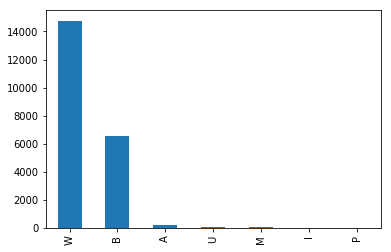

In [239]:
concatenated_df['Subject Race'].value_counts().plot(kind='bar')
plt.show()

While there are far more records that have a white race here, the black population in Austin is incredibly low, so this is massively disproportionate to demographic differences within the population. It'll be interesting to see how race correlates with the other variables.

In [240]:
print(concatenated_df['Subject Conduct Desc'].value_counts())

SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS                             12356
EDP/MENTALLY UNSTABLE                                                   3115
EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS       2145
; EDP/MENTALLY UNSTABLE                                                    1
; EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS        1
Name: Subject Conduct Desc, dtype: int64


I'm surprised there are only these two subject conduct descriptions. It'll be interesting to see how these pop up across different areas and nature for contact.

In [241]:
print(concatenated_df['Subject Resistance'].value_counts().head())

EMPTY HAND DEFENSIVE RESISTANCE                                  6833
EMPTY HAND ACTIVE AGGRESSION                                     4105
OTHER                                                            1547
VERBAL RESISTANCE/AGGRESSION; EMPTY HAND DEFENSIVE RESISTANCE    1484
PASSIVE RESISTANCE                                               1328
Name: Subject Resistance, dtype: int64


In [242]:
print(concatenated_df['Weapon Used 1'].value_counts().head())

WEAPONLESS (PRESSURE POINTS/KICKS/HAND)    16684
CED - PRONGS-ENTER # SHOTS                  1934
CHEMICAL AGENT - O C SPRAY                  1460
CED - DRIVE STUN-ENTER # SHOTS               568
OTHER                                        495
Name: Weapon Used 1, dtype: int64


In [243]:
print(concatenated_df['Number Shots'].value_counts())

1.0     2380
0.0      776
2.0      736
3.0      249
4.0       91
5.0       38
6.0       17
7.0       15
9.0        7
8.0        7
10.0       3
14.0       3
12.0       3
13.0       2
15.0       1
11.0       1
Name: Number Shots, dtype: int64


In [244]:
print(concatenated_df['Subject Effects'].value_counts())

NO COMPLAINT OF INJURY/PAIN                                                           12729
MINOR INJURY                                                                           4066
COMPLAINT OF INJURY/PAIN                                                               2607
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                                             1857
MINOR INJURY; COMPLAINT OF INJURY/PAIN                                                  698
MINOR INJURY; NO COMPLAINT OF INJURY/PAIN                                               151
SERIOUS INJURY                                                                           47
DEATH                                                                                    31
COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                     19
COMPLAINT OF INJURY/PAIN; NO COMPLAINT OF INJURY/PAIN                                    11
MINOR INJURY; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                        

In [245]:
print(concatenated_df['Effect on Officer'].value_counts())

NO COMPLAINT OF INJURY/PAIN                                                19184
MINOR INJURY                                                                1334
COMPLAINT OF INJURY/PAIN                                                     750
MINOR INJURY; COMPLAINT OF INJURY/PAIN                                       189
COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED                                   124
MINOR INJURY; NO COMPLAINT OF INJURY/PAIN                                     22
COMPLAINT OF INJURY/PAIN; NO COMPLAINT OF INJURY/PAIN                         21
SERIOUS INJURY                                                                15
COMPLAINT OF INJURY/PAIN; COMPLAINT OF INJURY/PAIN BUT NONE OBSERVED           5
SERIOUS INJURY; COMPLAINT OF INJURY/PAIN                                       2
SERIOUS INJURY; NO COMPLAINT OF INJURY/PAIN                                    2
SERIOUS INJURY; MINOR INJURY                                                   1
MINOR INJURY; COMPLAINT OF I

In [246]:
# Patrol areas, defined at http://www.austintexas.gov/edims/document.cfm?id=168703

print(concatenated_df['Officer Organization Desc'].value_counts().head(10))

GEORGE 600 REG I PATROL       979
GEORGE 400 REG I PATROL       889
GEORGE 700 REG I PATROL       712
GEORGE 500 REG I PATROL       684
GEORGE 300 REG I PATROL       566
CHARLIE 400 REG III PATROL    503
CHARLIE 700 REG III PATROL    470
EDWARD 800 REG II PATROL      452
FRANK 700 REG IV PATROL       436
EDWARD 700 REG II PATROL      417
Name: Officer Organization Desc, dtype: int64


In [247]:
print(concatenated_df['Officer Commission Date'].value_counts().head(25))

04/23/2010 12:00:00 AM    1828
01/04/2008 12:00:00 AM    1739
01/02/2009 12:00:00 AM    1335
04/27/2007 12:00:00 AM    1234
10/07/2011 12:00:00 AM    1169
06/23/2006 12:00:00 AM    1059
06/18/2004 12:00:00 AM    1028
11/30/2012 12:00:00 AM     937
06/20/2008 12:00:00 AM     728
03/23/2012 12:00:00 AM     704
07/08/2005 12:00:00 AM     599
03/22/2013 12:00:00 AM     530
05/10/2002 12:00:00 AM     489
06/27/2003 12:00:00 AM     441
11/22/2002 12:00:00 AM     401
11/12/2010 12:00:00 AM     359
09/24/1999 12:00:00 AM     346
12/13/2013 12:00:00 AM     286
03/21/2014 12:00:00 AM     250
07/09/1999 12:00:00 AM     230
03/27/1998 12:00:00 AM     229
10/19/2001 12:00:00 AM     220
02/08/2002 12:00:00 AM     208
11/30/12                   200
3/21/14                    197
Name: Officer Commission Date, dtype: int64


It seems strange to me that a few of these commission dates show up far more than others. I'd like to look at trends across years, and see if it might be due to the areas where they patrol, or if it might be something specific to certain commmission date officers/cohorts of officers. Should also keep drop off over time in mind.

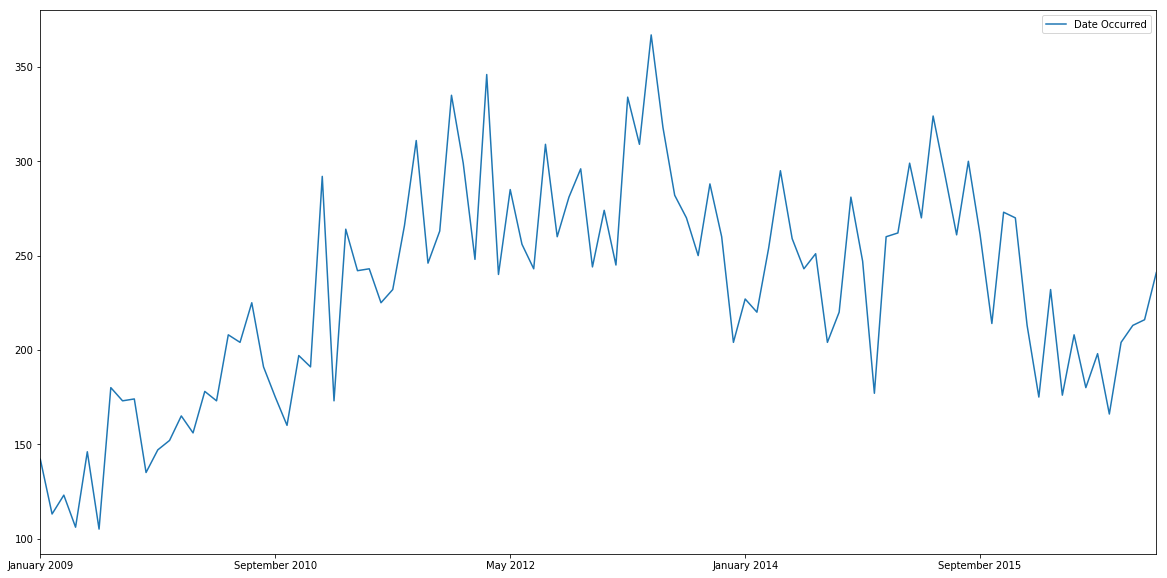

In [248]:
concatenated_df['Date Occurred'] = pd.to_datetime(concatenated_df['Date Occurred'])

# I want to sort these value counts by date rather than count, but couldn't find out how to do so.
# When I plot it now (using .plot.line()) it shows values going down, even if I specify a y axis of date
month_y_count_df = pd.DataFrame(concatenated_df['Date Occurred'].dt.strftime('%B %Y').value_counts())

# sort_index sorts alphabetically
month_y_count_df.sort_index().head()

# sort_values sorts by count
month_y_count_df.sort_values(by='Date Occurred').head()

# try making the index a date column
month_y_count_df['Month Year'] = month_y_count_df.index
month_y_count_df['Month Year'] = pd.to_datetime(month_y_count_df['Month Year'])

month_y_count_df.sort_values(by='Month Year').plot(figsize=(20,10), kind='line')
plt.show()

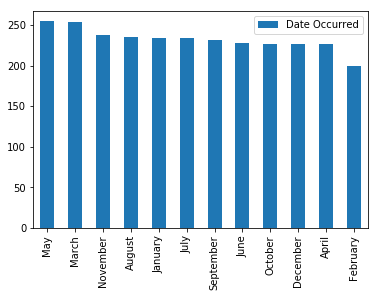

In [249]:
# grab counts only by month
month_counts = pd.DataFrame(concatenated_df['Date Occurred'].dt.strftime('%B').value_counts())

# divide by amount of years for average
month_counts_avg = month_counts/8
month_counts_avg.plot(kind='bar')
plt.show()

In [250]:
print(concatenated_df['Officer Commission Date'].value_counts().mean())
print(concatenated_df['Officer Commission Date'].value_counts().median())

101.28181818181818
10.0


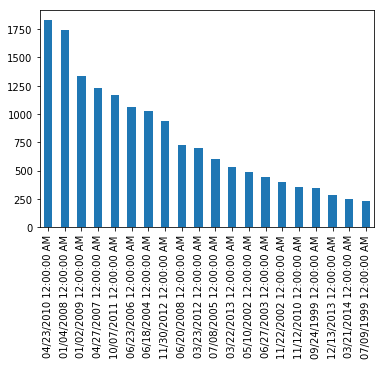

In [251]:
# divide by amount of years for average
concatenated_df['Officer Commission Date'].value_counts().head(20).plot(kind='bar')
plt.show()

In [254]:
concatenated_df['X-Coordinate'] = pd.to_numeric(concatenated_df['X-Coordinate'], errors='coerce')
concatenated_df['X-Coordinate'] = concatenated_df['X-Coordinate'][concatenated_df['X-Coordinate'] > 3090000]
concatenated_df['X-Coordinate'] = concatenated_df['X-Coordinate'][concatenated_df['X-Coordinate'] < 3160000]

concatenated_df['Y-Coordinate'] = pd.to_numeric(concatenated_df['Y-Coordinate'], errors='coerce')
concatenated_df['Y-Coordinate'] = concatenated_df['Y-Coordinate'][concatenated_df['Y-Coordinate'] > 10000000]
concatenated_df['Y-Coordinate'] = concatenated_df['Y-Coordinate'][concatenated_df['Y-Coordinate'] < 10200000]

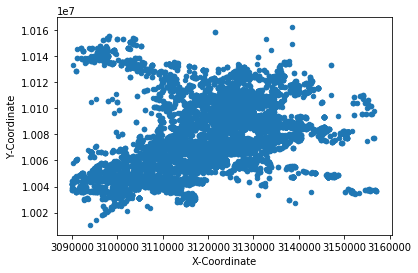

In [255]:
concatenated_df.plot.scatter('X-Coordinate', 'Y-Coordinate')
plt.show()

In [260]:
print(concatenated_df['X-Coordinate'].min())
print(concatenated_df['X-Coordinate'].max())
print(concatenated_df['Y-Coordinate'].min())
print(concatenated_df['Y-Coordinate'].max())

3090039.0
3157100.0
10010585.0
10162081.0


This looks like it will be awesome to overlay over a map once I'm able to convert it to actual latitude and longitude. I'm investigating how to do that now, as the provided data doesn't seem to translate directly into degrees and minutes. It looks like my coordinates should end up being around 30 and -97.

I'll probably also want to bin the data or alter the point markers and zoom in for sections, as there is a lot of overlap. I may be able to get away with this overlap when looking at different categories/filtering the scatter plots across both year and other variables.